In [100]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
k=5

In [102]:
def random_generator (n,min,max):
  lista =[]
  for i in range (0,n):
    lista.append([random.randrange(min,max),random.randrange(min,max)])
  return lista


In [103]:
my_list = np.array(random_generator(20,100,200))

In [104]:
def distortion_fun (center,points):
  d= np.zeros(len(points))
  for i in range(0,len(points)):
    d[i] = np.linalg.norm (center -points[i])
  sum_d= d.sum()
  return sum_d

In [105]:
def k_mean (k,data):
  n=2
  muc= random_generator(k,100,200) # centroides
  dist_function = [100000,10000]
  c = np.zeros(len(data)) # assigned centers
  while dist_function[n-2]-dist_function[n-1] > 0.001 :
    points = []
    for m in range(k):
      points.append([])
    dest= np.zeros([len(data),k])

# assign data to clasters
    for i in range (0,len(data)):
      for m in range (0,k) :
        dest[i][m] = np.linalg.norm(muc[m] - data[i])
      index = np.argmin(dest[i])
      points[index].append(data[i])
      c[i] = index
      #print (points)

# calculate new centroides
    for m in range (0,k):
      muc[m] =np.mean (points[m], axis = 0)
      dist_function.append( distortion_fun (np.array(muc[m]),points))
    n+=1
  return muc , c ,points,dist_function[n]
        

In [106]:
def k_mean_repeted (k ,my_list):
  mui =[]
  ci =[]
  pointsi=[]
  dist_fun =[]
  for i in range (10) :
    try:
      mu , c , points, dist_function= k_mean (k ,my_list)
      mui.append(mu)
      ci.append(c)
      pointsi.append(points)
      dist_fun.append(dist_function)
    except:
      pass
  choosen =np.argmin(dist_fun)
  return mui[choosen],ci[choosen],pointsi[choosen],dist_fun[choosen]

In [107]:
mu ,c , points, dist_fun =k_mean_repeted (k ,my_list)

In [108]:
def my_plotter (k , mu , points):
  for m in range (k) :
    x =[]
    y =[]
    for i in range(len(points[m])):
      x.append(points[m][i][0])
      y.append(points[m][i][1])
      plt.scatter(x,y)

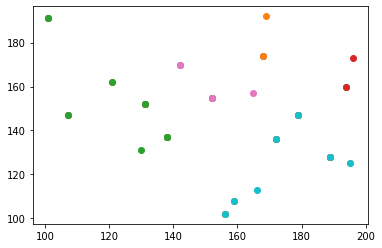

In [109]:
my_plotter (k , mu , points)